## Create violin plots

Load the relevant data using csv

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read csv correct in python
final_database = pd.read_csv("path_to_final_database/feasibility_database.csv")
# Remove subjects which are in the training set
# Apply the filtering criteria
wear_time_incl_week0 = final_database['Incl_wear_time_week0'] == 0
ecg_incl = final_database['exclusion_rhythm'] == 1
wear_time_incl_week1 = final_database['Incl_wear_time_week1'] == 0
training_incl = final_database['training_set'] == 1  # Remove subjects in the training set

# Combine criteria
combined_criteria = wear_time_incl_week0 | wear_time_incl_week1 | ecg_incl | training_incl

# Create final database by filtering out the unwanted rows
final_database = final_database[~combined_criteria]  # ~ negates the condition to keep rows that don't match



Create relevant ratios 

In [2]:
final_database['hq_ratio_unadj_week0'] = final_database['mean_hq_time_day_week0_unadj'] / final_database['mean_sync_time_day_week0_unadj'] * 100
final_database['hq_ratio_adj_week0'] = final_database['mean_hq_time_day_week0'] / final_database['mean_sync_time_day_week0_unadj'] * 100
final_database['hq_ratio_unadj_week1'] = final_database['mean_hq_time_day_week1_unadj'] / final_database['mean_sync_time_day_week1_unadj'] * 100
final_database['hq_ratio_adj_week1'] = final_database['mean_hq_time_day_week1'] / final_database['mean_sync_time_day_week1_unadj'] * 100

Create violin plot function for clustered plot for tremor

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tremor_data(final_database, y_label, value_vars, x_label='Tremor', custom_palette=None, inner = 'point', ylim = [0, 100], output_path=None):
    # Create tertiles based on tremor scores
    final_database['tremor_label'] = final_database['Up3OfRAmpArmYesDev'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if pd.notna(x) and x > 1 else x)))
    
    # Melt the data for plotting based on value_vars
    plot_data = final_database.melt(
        id_vars=['tremor_label'], 
        value_vars=value_vars, 
        var_name='Pipeline', 
        value_name='Value'
    )

    # Rename filter types for better readability
    plot_data['Pipeline'] = plot_data['Pipeline'].replace({value_vars[0]: 'Step 1', value_vars[1]: 'Step 1 + 2'})

    # Define custom colors if not provided
    if custom_palette is None:
        custom_palette = [(0.8549, 0.9098, 0.9882), (0.9725, 0.8078, 0.800)]
    
    # Create the violin plot
    plt.figure(figsize=(9, 5))
    sns.violinplot(     
        x='tremor_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data, 
        split=False,  # No splitting of violins
        inner=inner, 
        dodge=True,    # Separate violins for each hue
        palette=custom_palette,
        linewidth=1.5
    )

    sns.stripplot(
        x='tremor_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data,  
        dodge=True,  
        color='black',  
        alpha=0.3,  
        size=2.5  ,
        legend=False,
        jitter=0.05
    )

    # Customize plot
    plt.ylabel(y_label, fontsize=14)

    plt.legend(title='Pipeline', fontsize=12, title_fontsize='13', loc='upper right')
    plt.xticks(
        ticks=[0, 1, 2],  # These correspond to the tremor labels
        labels=['No tremor', 'Mild tremor', 'Severe tremor']  # Custom labels
    )
    # improve font size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().set_xlabel(x_label)
    # Set y-axis limits to avoid crossing zero
    plt.ylim(ylim)

    plt.tight_layout()

    # Show plot
    if output_path is not None:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")

    plt.show()

Now for proportion of high-quality segments

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\1750767568.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


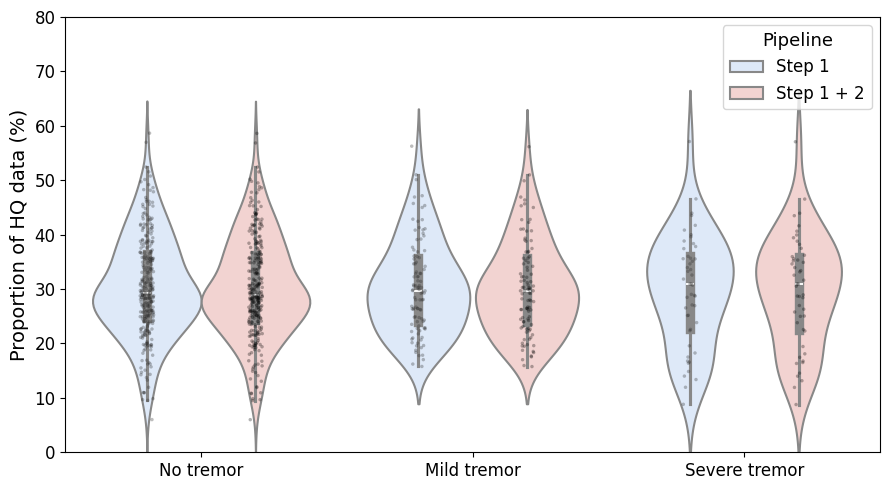

In [ ]:
output_path = r"path_to_output/violin_plots_tremor_grouped_week0.png"  # Replace with your desired file name
plot_tremor_data(final_database, 'Proportion of HQ data (%)', ['hq_ratio_unadj_week0', 'hq_ratio_adj_week0'], x_label='', inner='box', ylim=[0, 80], output_path=output_path)

Now I want the same plot for the heart rate estimates

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\1750767568.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


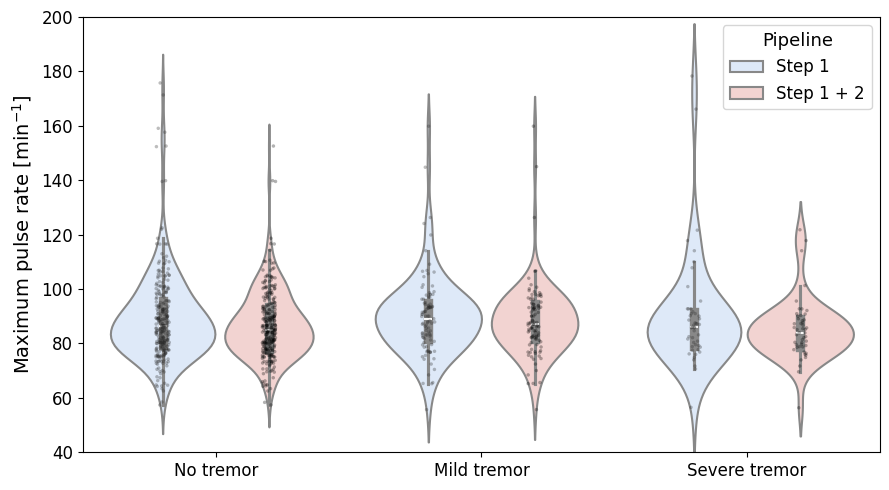

In [ ]:
output_path = r"path_to_output/violin_plots_max_hr_tremor_grouped_week0.png"  # Replace with your desired file name
plot_tremor_data(final_database, 'Maximum pulse rate [min$^{-1}$]', ['HR_max_day_week0_unadj', 'HR_max_day_week0'], x_label='', inner='box', ylim=[40, 200], output_path=output_path)

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\1750767568.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


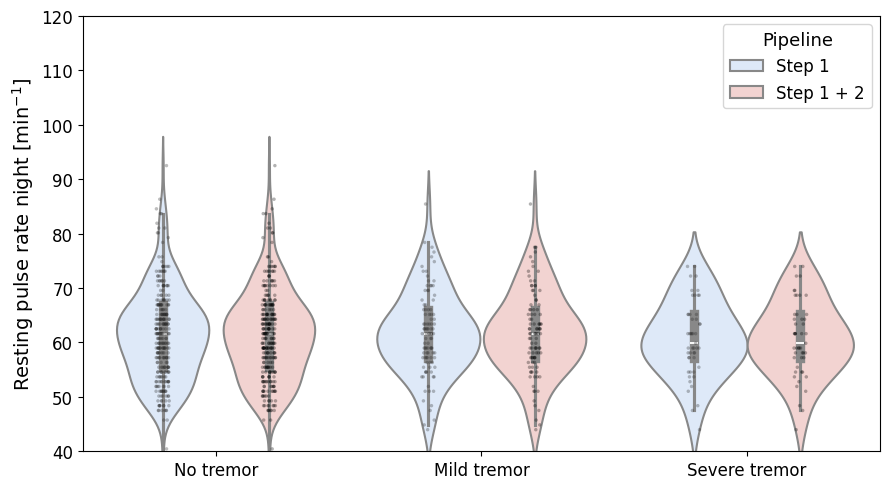

In [ ]:
output_path = r"path_to_output/violin_plots_resting_hr_night_tremor_grouped_week0.png"  # Replace with your desired file name
plot_tremor_data(final_database, 'Resting pulse rate night [min$^{-1}$]', ['HR_rest_night_week0_unadj', 'HR_rest_night_week0'], x_label='', inner='box', ylim=[40, 120], output_path=output_path)

Now for dyskinesia

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dyskinesia_data(final_database, y_label, value_vars, x_label='Dyskinesia', custom_palette=None, inner = 'point', ylim = [0, 100], output_path=None):
    # Create tertiles based on dyskinesia scores
    final_database['dys_label'] = final_database['UPDRS4_sum_factor1'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if pd.notna(x) and x > 1 else x)))
    
    # Melt the data for plotting based on value_vars
    plot_data = final_database.melt(
        id_vars=['dys_label'], 
        value_vars=value_vars, 
        var_name='Pipeline', 
        value_name='Value'
    )

    # Rename filter types for better readability
    plot_data['Pipeline'] = plot_data['Pipeline'].replace({value_vars[0]: 'Step 1', value_vars[1]: 'Step 1 + 2'})

    # Define custom colors if not provided
    if custom_palette is None:
        custom_palette = [(0.8549, 0.9098, 0.9882), (0.9725, 0.8078, 0.800)]
    
    # Create the violin plot
    plt.figure(figsize=(9, 5))
    sns.violinplot(
        x='dys_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data, 
        split=False,  # No splitting of violins
        inner=inner, 
        dodge=True,    # Separate violins for each hue
        palette=custom_palette,
        linewidth=1.5
    )

    sns.stripplot(
        x='dys_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data,  
        dodge=True,  
        color='black',  
        alpha=0.3,  
        size=2.5  ,
        legend=False,
        jitter=0.05
    )

    # Customize plot
    plt.ylabel(y_label, fontsize=14)

    plt.legend(title='Pipeline', fontsize=12, title_fontsize='13', loc='upper right')
    plt.xticks(
        ticks=[0, 1, 2],  # These correspond to the dyskinesia labels
        labels=['No dyskinesia', 'Mild dyskinesia', 'Severe dyskinesia']  # Custom labels
    )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().set_xlabel(x_label)
    # Set y-axis limits to avoid crossing zero
    plt.ylim(ylim)
    plt.tight_layout()

    # Show plot
    if output_path is not None:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")

    plt.show()

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\4105327157.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


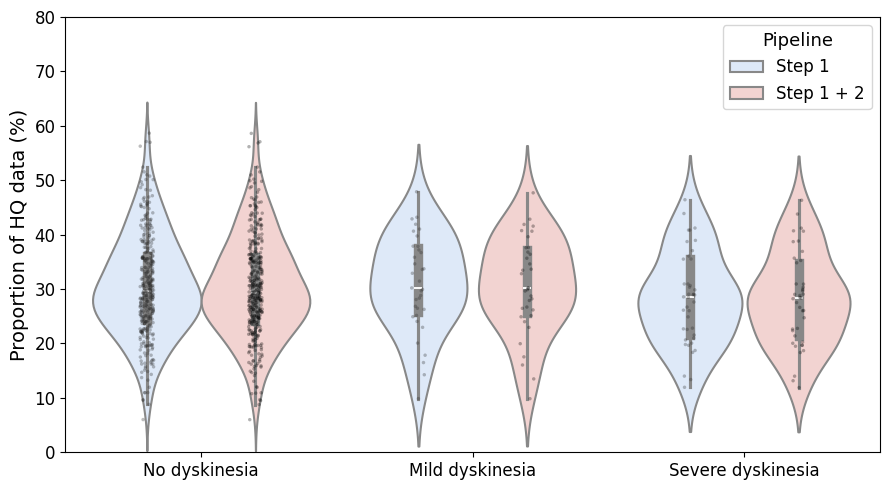

In [ ]:
output_path = r"path_to_output/violin_plots_dyskinesia_grouped_week0.png"  # Replace with your desired file name
plot_dyskinesia_data(final_database, 'Proportion of HQ data (%)', ['hq_ratio_unadj_week0', 'hq_ratio_adj_week0'], x_label='', inner='box', ylim=[0, 80], output_path=output_path)

Now I want to have the violin plots for dyskinesia

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\4105327157.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


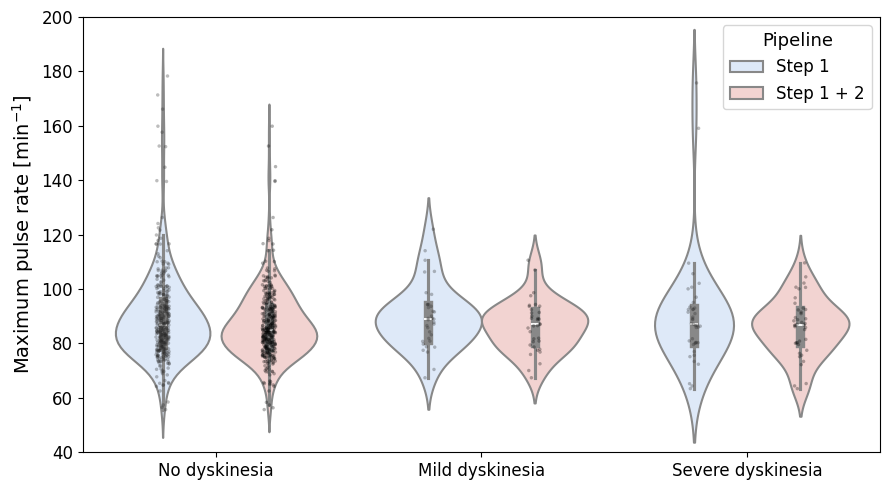

In [ ]:
output_path = r"path_to_output/violin_plots_max_hr_dyskinesia_grouped_week0.png"  # Replace with your desired file name
plot_dyskinesia_data(final_database, 'Maximum pulse rate [min$^{-1}$]', ['HR_max_day_week0_unadj', 'HR_max_day_week0'], x_label='', inner='box', ylim=[40, 200], output_path=output_path)

C:\Users\z863160\AppData\Local\Temp\ipykernel_32844\4105327157.py:38: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


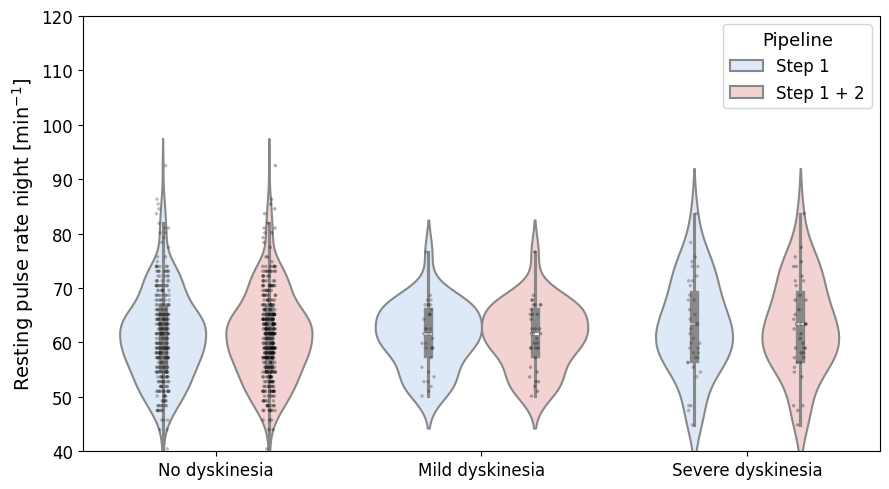

In [ ]:
output_path = r"path_to_output/violin_plots_resting_hr_night_dyskinesia_grouped_week0.png"  # Replace with your desired file name
plot_dyskinesia_data(final_database, 'Resting pulse rate night [min$^{-1}$]', ['HR_rest_night_week0_unadj', 'HR_rest_night_week0'], x_label='', inner='box', ylim=[40, 120], output_path=output_path)

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_delta_hr_tremor_data(final_database, y_label, value_vars, x_label='Tremor', custom_palette=None, inner = 'point', ylim = [0, 100], output_path=None):
    # Create tertiles based on tremor scores
    final_database['tremor_label'] = final_database['Up3OfRAmpArmYesDev'].apply(lambda x: 0 if x == 0 else (1 if x == 1 else (2 if pd.notna(x) and x > 1 else x)))
    
    # Melt the data for plotting based on value_vars
    plot_data = final_database.melt(
        id_vars=['tremor_label'], 
        value_vars=value_vars, 
        var_name='Pipeline', 
        value_name='Value'
    )

    # Rename filter types for better readability
    plot_data['Pipeline'] = plot_data['Pipeline'].replace({value_vars[0]: 'Delta'})

    # Define custom colors if not provided
    if custom_palette is None:
        custom_palette = [(0.8549, 0.9098, 0.9882), (0.9725, 0.8078, 0.800)]
    
    # Create the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(     
        x='tremor_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data, 
        split=False,  # No splitting of violins
        inner=inner, 
        dodge=True,    # Separate violins for each hue
        palette=custom_palette
    )

    sns.stripplot(
        x='tremor_label', 
        y='Value', 
        hue='Pipeline', 
        data=plot_data,  
        dodge=True,  
        color='black',  
        alpha=0.3,  
        size=2.5  ,
        legend=False,
        jitter=0.05
    )

    # Customize plot
    plt.ylabel(y_label)
    plt.legend(title='Pipeline')
    plt.xticks(
        ticks=[0, 1, 2],  # These correspond to the tremor labels
        labels=['No tremor', 'Mild tremor', 'Severe tremor']  # Custom labels
    )
    plt.gca().set_xlabel(x_label)
    # Set y-axis limits to avoid crossing zero
    plt.ylim(ylim)

    plt.tight_layout()

    # Show plot
    if output_path is not None:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")

    plt.show()